In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import math

In [2]:
%matplotlib inline

In [3]:
from utils.config import DATAFOLDER, SVM_PARAM, OPTIMIZER
from models.Regressor import getmodel, myCallbacks

In [4]:
file_loc = os.path.join(DATAFOLDER, "main.csv")
df = pd.read_csv(file_loc)

In [5]:
outlier = []
for counter, i in enumerate(df['Wind speed']):
    if i > 4.0:
        outlier.append(counter)
print(outlier)
df = df.drop(outlier,axis=0)

[41, 58, 64, 78, 112, 113, 118, 121, 139, 140, 143, 150, 151, 405, 433, 485, 488, 514, 515, 521, 537, 576, 578, 583, 751, 778, 788, 798, 799, 809, 820, 821, 825, 830, 835, 840, 848, 850, 858, 859, 865, 872, 873, 879, 882, 884, 885, 893, 898, 938, 1446, 1452, 1453, 1480, 1481, 1498, 1499, 1509, 1510, 1516, 1517, 1522, 1524, 1533, 1537, 1540, 1541, 1546, 1547, 1558, 1560, 1574, 1575, 1590, 1592, 1596, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1613, 1614, 1615, 1616, 1618, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1629, 1630, 1631, 1637, 1638, 1639, 1650, 1651, 1652, 1653, 1656, 1662, 1664, 1670, 1674, 1678, 1679, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1828, 1867, 1873, 1875, 1877, 1881, 1887, 1888, 1899, 1900, 1906, 1913, 1922, 1927, 1933, 1937, 1938, 1953, 1959, 1961, 1962, 1963, 1964, 1966, 1969, 1970, 1974, 1976, 1980, 1982, 1983, 1988, 1992, 1994, 1995, 1999, 2000, 2002, 2003, 2010, 2016, 2018, 2021, 2023, 2026, 2048, 2054, 2055, 2056, 2066, 2069, 2077, 2078, 2079, 2098, 212

In [6]:
df.head()

,Rainfall,Max Temperature,Min Temperature,Maximum Humidity,Min Humidity,Wind Direction,CC,EVP,Wind speed,Solar Radiation,date
0,0.0,17.0,6.8,92.0,65.0,125.0,2.0,0.5,1.0,13.475,1/1
1,0.0,18.0,6.8,97.0,64.0,125.0,2.0,0.0,1.2,13.475,1/2
2,0.0,17.5,6.8,98.0,74.0,130.0,2.0,0.0,0.8,13.475,1/3
3,0.0,19.2,10.4,97.0,50.0,360.0,2.0,0.8,1.2,13.475,1/4
4,0.0,20.3,10.4,95.0,58.0,270.0,2.0,1.2,1.2,13.475,1/5


In [7]:
df = df.drop(columns=['date',"CC"]).dropna()


## Averagin min and max parameter
max_t = df["Max Temperature"]
min_t = df["Min Temperature"]
min_h = df['Min Humidity']
max_h = df["Maximum Humidity"]

t = (max_t.values + min_t.values)/2
h = (min_h.values + max_h.values)/2

# df = df.drop(columns=['Min Humidity',"Maximum Humidity"])
# df["Temperature"] = t
# df["Humidity"] = h

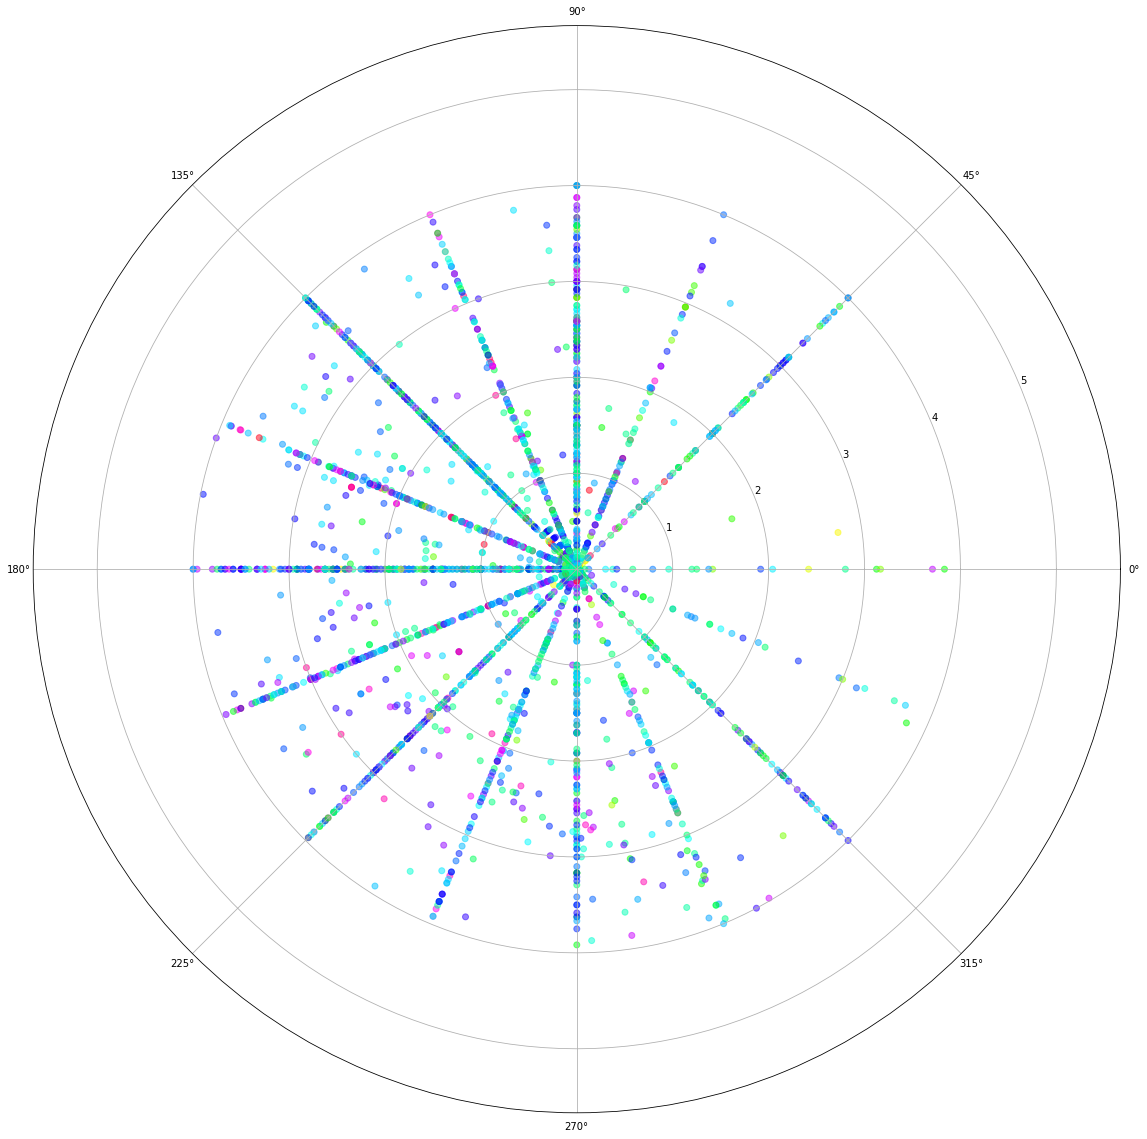

In [8]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter([x*math.pi/180 for x in df["Wind Direction"]], df["Wind speed"], c=df["Solar Radiation"], cmap='hsv', alpha=0.5)

In [9]:
df.corr()

,Rainfall,Max Temperature,Min Temperature,Maximum Humidity,Min Humidity,Wind Direction,EVP,Wind speed,Solar Radiation
Rainfall,1.000000,0.024533,0.149575,0.123694,0.207492,-0.077792,0.013407,0.048661,-0.048137
Max Temperature,0.024533,1.000000,0.821433,-0.310360,-0.254093,-0.072820,0.584610,0.145665,0.661158
Min Temperature,0.149575,0.821433,1.000000,-0.156000,0.038278,-0.162786,0.503346,0.123128,0.441488
Maximum Humidity,0.123694,-0.310360,-0.156000,1.000000,0.402447,-0.038490,-0.329079,-0.013008,-0.415978
Min Humidity,0.207492,-0.254093,0.038278,0.402447,1.000000,-0.142979,-0.182775,-0.277605,-0.348659
Wind Direction,-0.077792,-0.072820,-0.162786,-0.038490,-0.142979,1.000000,-0.072516,0.019178,-0.031467
EVP,0.013407,0.584610,0.503346,-0.329079,-0.182775,-0.072516,1.000000,0.021281,0.496871
Wind speed,0.048661,0.145665,0.123128,-0.013008,-0.277605,0.019178,0.021281,1.000000,0.156750
Solar Radiation,-0.048137,0.661158,0.441488,-0.415978,-0.348659,-0.031467,0.496871,0.156750,1.000000


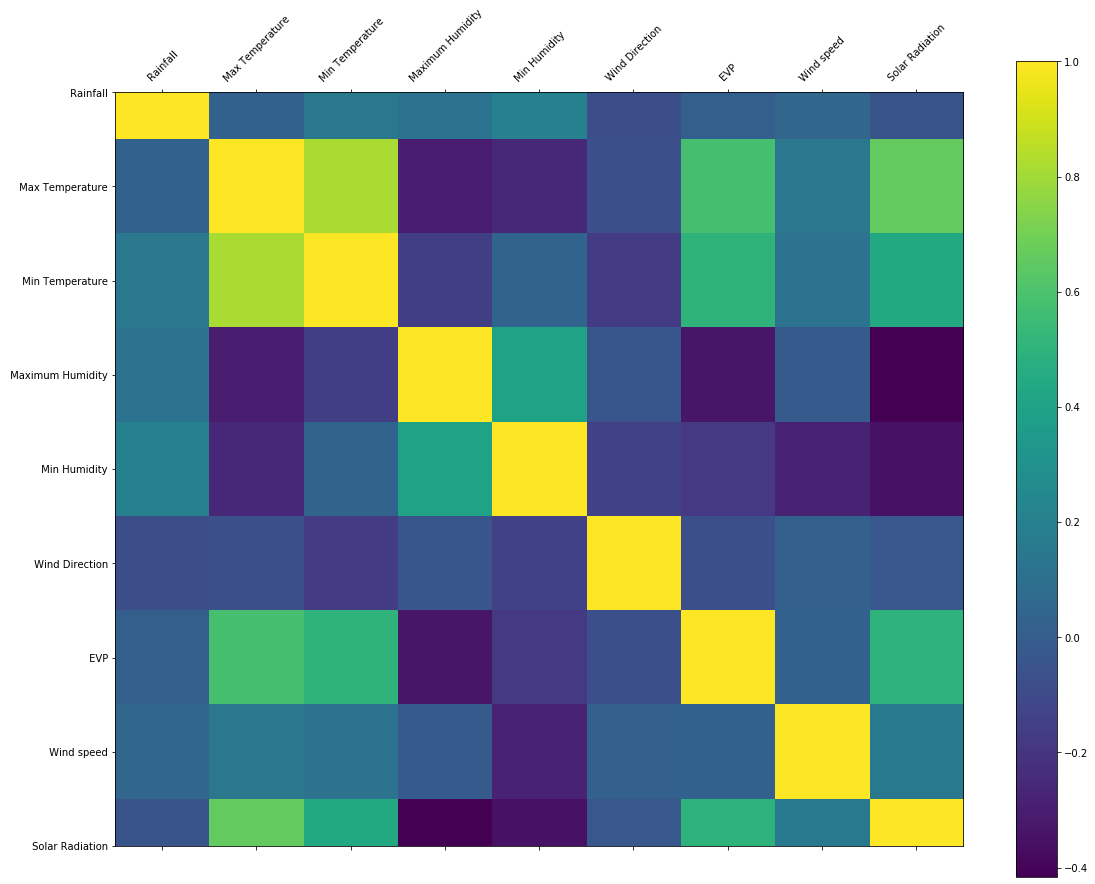

In [10]:
f = plt.figure(figsize=(19, 15))
ax = f.add_subplot(111)
cax = ax.matshow(df.corr(), interpolation='nearest')
f.colorbar(cax)
ax.set_xticks(range(0,9))
ax.set_yticks(range(0,9))
ax.set_xticklabels(" " + df.corr().columns, rotation=45)
ax.set_yticklabels(" " + df.corr().columns)
plt.show()

## Preprocessing of data

In [11]:
Y = df["Wind speed"]
X = df.drop(columns=["Wind speed"])

In [12]:
x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [13]:
# y = np.reshape(Y.values, (len(Y.values),1))
# min_max_scaler = MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(y)
# Y = pd.DataFrame(y_scaled)

In [14]:
X.describe()

,0,1,2,3,4,5,6,7
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,0.009396,0.609543,0.543159,0.166392,0.424011,0.497822,0.159163,0.568206
std,0.045478,0.171716,0.227812,0.060322,0.247427,0.205332,0.114237,0.171682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.494681,0.354232,0.125000,0.224719,0.371644,0.083333,0.441532
50%,0.000000,0.646277,0.583072,0.184524,0.404494,0.500000,0.137500,0.552861
75%,0.000000,0.734043,0.749216,0.211310,0.595506,0.625000,0.216667,0.682353
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
Y.describe()

count    2701.000000
mean        1.665730
std         1.153222
min         0.000000
25%         0.625000
50%         1.583333
75%         2.583333
max         4.000000
Name: Wind speed, dtype: float64

## Normalised prediction using features

In [16]:
from utils.helper import Plotter
from sklearn.model_selection import train_test_split
plotter = Plotter()

In [17]:
# X_val = X[-10:]
# Y_val = Y[-10:]



X_train, X_test, Y_train, Y_test = train_test_split(X[-365:],Y[-365:], test_size=0.1)

In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(328, 8)
(328,)
(37, 8)
(37,)


{'e': 0.5, 's': 0.5, 'c': 100}
-----------------------------------------------------------
MSE: 0.5426056705474498 MAE: 0.5890724712227984 R2: 0.7412213968877179
-----------------------------------------------------------


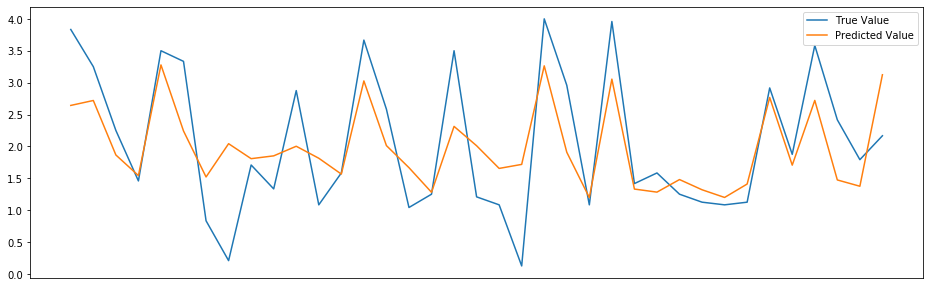

{'e': 1, 's': 1, 'c': 100}
-----------------------------------------------------------
MSE: 0.6277110722759756 MAE: 0.6722877380575906 R2: 0.6919074315829992
-----------------------------------------------------------


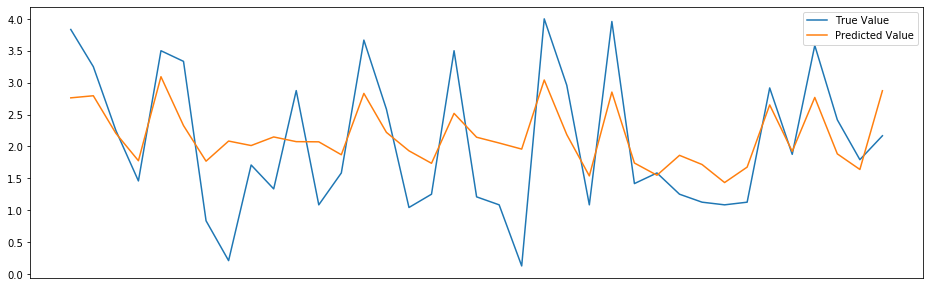

{'e': 0.5, 's': 1, 'c': 500}
-----------------------------------------------------------
MSE: 0.5305361964110408 MAE: 0.5794579890877802 R2: 0.7479518014229722
-----------------------------------------------------------


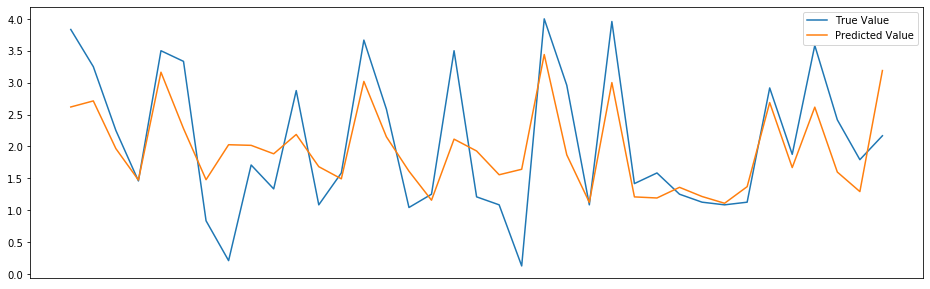

{'e': 0.5, 's': 1, 'c': 1000}
-----------------------------------------------------------
MSE: 0.5349079945692312 MAE: 0.5853059364005369 R2: 0.7455209364550293
-----------------------------------------------------------


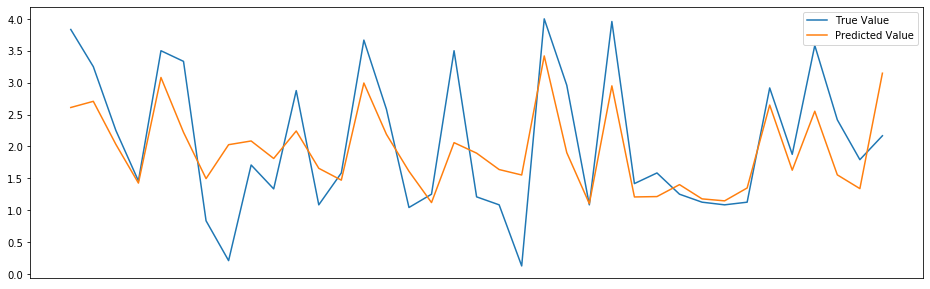

In [19]:
from sklearn import svm
for i in SVM_PARAM:
    print(i)
    svr = svm.SVR(C=i['c'], epsilon=i['e'], gamma="auto", coef0=i['s'])
    svr.fit(X_train, Y_train)
    plotter.find_accurracy_on_testset(svr, X_test, Y_test,clip=False, plot=True)
#     plotter.find_accurracy_on_testset(svr, X_val, Y_val,clip=False, plot= True)

------------------------------------------
RMSprop
------------------------------------------

The mean absolute error for epoch 0 is    1.78 and mean squared error is    4.06.
The mean absolute error for epoch 1 is    0.88 and mean squared error is    1.25.
The mean absolute error for epoch 2 is    0.71 and mean squared error is    0.74.
The mean absolute error for epoch 3 is    0.65 and mean squared error is    0.63.
The mean absolute error for epoch 4 is    0.73 and mean squared error is    0.77.
The mean absolute error for epoch 5 is    0.65 and mean squared error is    0.65.
The mean absolute error for epoch 6 is    0.69 and mean squared error is    0.68.
The mean absolute error for epoch 7 is    0.67 and mean squared error is    0.69.
The mean absolute error for epoch 8 is    0.68 and mean squared error is    0.68.
The mean absolute error for epoch 9 is    0.66 and mean squared error is    0.65.
The mean absolute error for epoch 10 is    0.66 and mean squared error is    0.65.
Th

W0825 23:45:48.407514 18024 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 19 is    0.63 and mean squared error is    0.58.
The mean absolute error for epoch 20 is    0.66 and mean squared error is    0.66.
The mean absolute error for epoch 21 is    0.64 and mean squared error is    0.62.
The mean absolute error for epoch 22 is    0.64 and mean squared error is    0.61.
The mean absolute error for epoch 23 is    0.64 and mean squared error is    0.61.
The mean absolute error for epoch 24 is    0.62 and mean squared error is    0.60.
-----------------------------------------------------------
MSE: 0.705637928724774 MAE: 0.712890853752961 R2: 0.6434468426372649
-----------------------------------------------------------


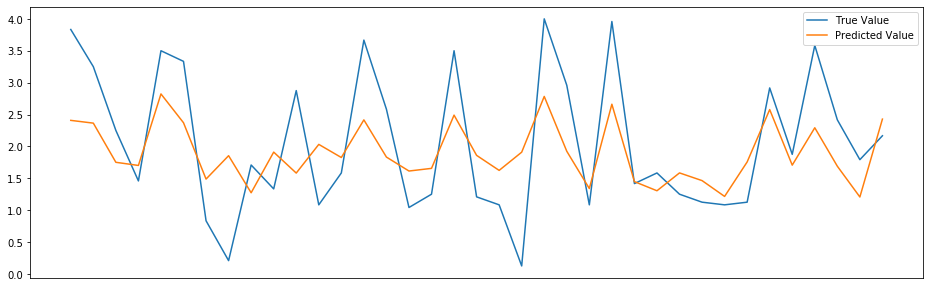






------------------------------------------
SGD
------------------------------------------

The mean absolute error for epoch 0 is    1.34 and mean squared error is    2.64.
The mean absolute error for epoch 1 is    0.72 and mean squared error is    0.75.
The mean absolute error for epoch 2 is    0.69 and mean squared error is    0.68.
The mean absolute error for epoch 3 is    0.72 and mean squared error is    0.74.
The mean absolute error for epoch 4 is    0.70 and mean squared error is    0.72.
The mean absolute error for epoch 5 is    0.71 and mean squared error is    0.72.
The mean absolute error for epoch 6 is    0.69 and mean squared error is    0.69.
The mean absolute error for epoch 7 is    0.67 and mean squared error is    0.65.
The mean absolute error for epoch 8 is    0.71 and mean squared error is    0.72.
The mean absolute error for epoch 9 is    0.69 and mean squared error is    0.71.
The mean absolute error for epoch 10 is    0.68 and mean squared error is    0.67.
T

W0825 23:45:50.165230 18024 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 19 is    0.70 and mean squared error is    0.71.
The mean absolute error for epoch 20 is    0.66 and mean squared error is    0.65.
The mean absolute error for epoch 21 is    0.68 and mean squared error is    0.67.
The mean absolute error for epoch 22 is    0.67 and mean squared error is    0.65.
The mean absolute error for epoch 23 is    0.69 and mean squared error is    0.69.
The mean absolute error for epoch 24 is    0.66 and mean squared error is    0.65.
-----------------------------------------------------------
MSE: 0.8527386996668247 MAE: 0.8041233812366521 R2: 0.540248416997226
-----------------------------------------------------------


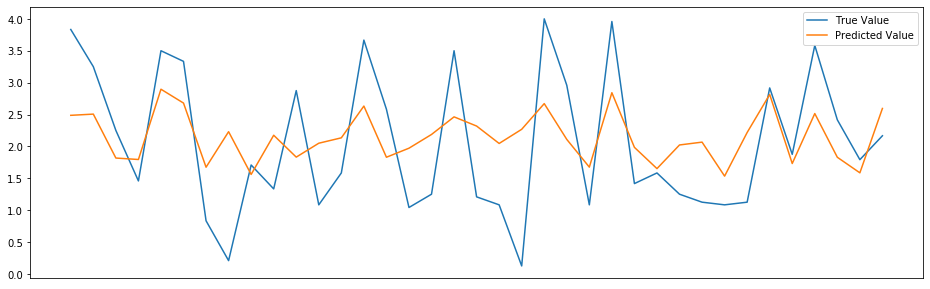






------------------------------------------
Adagrad
------------------------------------------

The mean absolute error for epoch 0 is    1.18 and mean squared error is    2.18.
The mean absolute error for epoch 1 is    0.69 and mean squared error is    0.70.
The mean absolute error for epoch 2 is    0.70 and mean squared error is    0.73.
The mean absolute error for epoch 3 is    0.69 and mean squared error is    0.70.
The mean absolute error for epoch 4 is    0.70 and mean squared error is    0.74.
The mean absolute error for epoch 5 is    0.68 and mean squared error is    0.68.
The mean absolute error for epoch 6 is    0.69 and mean squared error is    0.70.
The mean absolute error for epoch 7 is    0.62 and mean squared error is    0.60.
The mean absolute error for epoch 8 is    0.72 and mean squared error is    0.76.
The mean absolute error for epoch 9 is    0.65 and mean squared error is    0.64.
The mean absolute error for epoch 10 is    0.68 and mean squared error is    0.6

W0825 23:45:52.467547 18024 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 24 is    0.67 and mean squared error is    0.66.
-----------------------------------------------------------
MSE: 0.7940611627594021 MAE: 0.7742320524679648 R2: 0.5836054987790816
-----------------------------------------------------------


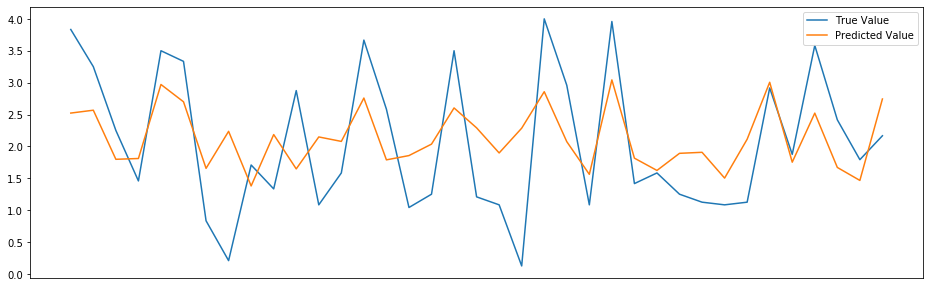






------------------------------------------
Adadelta
------------------------------------------

The mean absolute error for epoch 0 is    2.09 and mean squared error is    5.21.
The mean absolute error for epoch 1 is    1.88 and mean squared error is    4.34.
The mean absolute error for epoch 2 is    1.66 and mean squared error is    3.58.
The mean absolute error for epoch 3 is    1.20 and mean squared error is    2.10.
The mean absolute error for epoch 4 is    0.82 and mean squared error is    1.06.
The mean absolute error for epoch 5 is    0.69 and mean squared error is    0.73.
The mean absolute error for epoch 6 is    0.72 and mean squared error is    0.76.
The mean absolute error for epoch 7 is    0.69 and mean squared error is    0.69.
The mean absolute error for epoch 8 is    0.66 and mean squared error is    0.68.
The mean absolute error for epoch 9 is    0.72 and mean squared error is    0.74.
The mean absolute error for epoch 10 is    0.67 and mean squared error is    0.

W0825 23:45:54.147686 18024 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 20 is    0.66 and mean squared error is    0.66.
The mean absolute error for epoch 21 is    0.67 and mean squared error is    0.66.
The mean absolute error for epoch 22 is    0.67 and mean squared error is    0.66.
The mean absolute error for epoch 23 is    0.68 and mean squared error is    0.69.
The mean absolute error for epoch 24 is    0.65 and mean squared error is    0.62.
-----------------------------------------------------------
MSE: 0.8355008992600826 MAE: 0.7947287226582433 R2: 0.5533380286061821
-----------------------------------------------------------


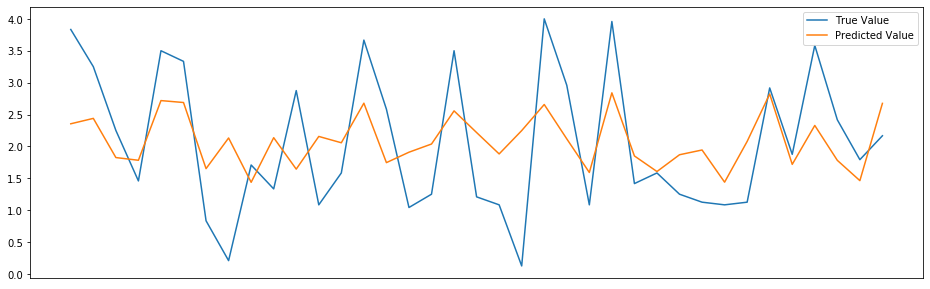






------------------------------------------
Adam
------------------------------------------

The mean absolute error for epoch 0 is    1.73 and mean squared error is    3.83.
The mean absolute error for epoch 1 is    1.00 and mean squared error is    1.57.
The mean absolute error for epoch 2 is    0.74 and mean squared error is    0.82.
The mean absolute error for epoch 3 is    0.73 and mean squared error is    0.78.
The mean absolute error for epoch 4 is    0.68 and mean squared error is    0.72.
The mean absolute error for epoch 5 is    0.74 and mean squared error is    0.79.
The mean absolute error for epoch 6 is    0.69 and mean squared error is    0.71.
The mean absolute error for epoch 7 is    0.68 and mean squared error is    0.69.
The mean absolute error for epoch 8 is    0.70 and mean squared error is    0.73.
The mean absolute error for epoch 9 is    0.65 and mean squared error is    0.64.
The mean absolute error for epoch 10 is    0.68 and mean squared error is    0.68.


W0825 23:45:56.023149 18024 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 19 is    0.63 and mean squared error is    0.61.
The mean absolute error for epoch 20 is    0.64 and mean squared error is    0.62.
The mean absolute error for epoch 21 is    0.65 and mean squared error is    0.63.
The mean absolute error for epoch 22 is    0.65 and mean squared error is    0.63.
The mean absolute error for epoch 23 is    0.63 and mean squared error is    0.60.
The mean absolute error for epoch 24 is    0.67 and mean squared error is    0.66.
-----------------------------------------------------------
MSE: 0.7128606651270831 MAE: 0.7219272411621368 R2: 0.6387690751310963
-----------------------------------------------------------


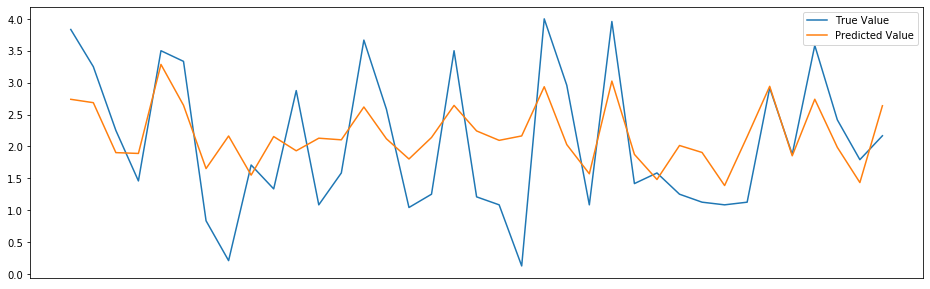






------------------------------------------
Adamax
------------------------------------------

The mean absolute error for epoch 0 is    1.86 and mean squared error is    4.32.
The mean absolute error for epoch 1 is    0.96 and mean squared error is    1.46.
The mean absolute error for epoch 2 is    0.75 and mean squared error is    0.82.
The mean absolute error for epoch 3 is    0.73 and mean squared error is    0.77.
The mean absolute error for epoch 4 is    0.70 and mean squared error is    0.71.
The mean absolute error for epoch 5 is    0.69 and mean squared error is    0.70.
The mean absolute error for epoch 6 is    0.66 and mean squared error is    0.65.
The mean absolute error for epoch 7 is    0.68 and mean squared error is    0.69.
The mean absolute error for epoch 8 is    0.68 and mean squared error is    0.67.
The mean absolute error for epoch 9 is    0.68 and mean squared error is    0.68.
The mean absolute error for epoch 10 is    0.68 and mean squared error is    0.68

W0825 23:45:58.030650 18024 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 24 is    0.63 and mean squared error is    0.60.
-----------------------------------------------------------
MSE: 0.7795004033105553 MAE: 0.7587255271705421 R2: 0.5938745073694457
-----------------------------------------------------------


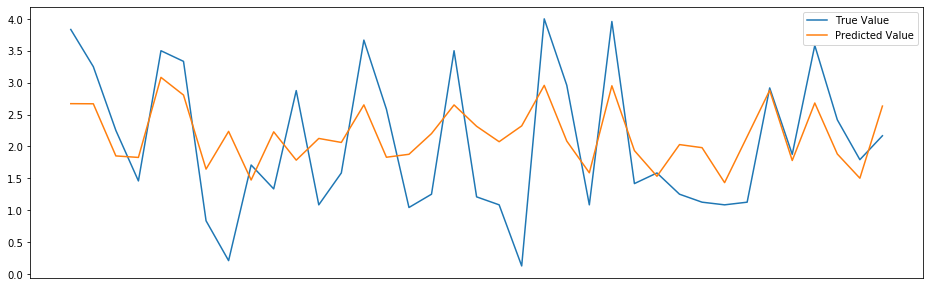






------------------------------------------
Nadam
------------------------------------------

The mean absolute error for epoch 0 is    1.17 and mean squared error is    2.13.
The mean absolute error for epoch 1 is    0.68 and mean squared error is    0.68.
The mean absolute error for epoch 2 is    0.63 and mean squared error is    0.62.
The mean absolute error for epoch 3 is    0.70 and mean squared error is    0.72.
The mean absolute error for epoch 4 is    0.63 and mean squared error is    0.61.
The mean absolute error for epoch 5 is    0.68 and mean squared error is    0.71.
The mean absolute error for epoch 6 is    0.62 and mean squared error is    0.58.
The mean absolute error for epoch 7 is    0.66 and mean squared error is    0.68.
The mean absolute error for epoch 8 is    0.62 and mean squared error is    0.57.
The mean absolute error for epoch 9 is    0.65 and mean squared error is    0.64.
The mean absolute error for epoch 10 is    0.63 and mean squared error is    0.60.

W0825 23:46:00.580423 18024 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 18 is    0.62 and mean squared error is    0.57.
The mean absolute error for epoch 19 is    0.62 and mean squared error is    0.59.
The mean absolute error for epoch 20 is    0.60 and mean squared error is    0.56.
The mean absolute error for epoch 21 is    0.60 and mean squared error is    0.55.
The mean absolute error for epoch 22 is    0.68 and mean squared error is    0.70.
The mean absolute error for epoch 23 is    0.60 and mean squared error is    0.55.
The mean absolute error for epoch 24 is    0.64 and mean squared error is    0.62.
-----------------------------------------------------------
MSE: 0.6134504103761741 MAE: 0.6421945803874248 R2: 0.7004129061050823
-----------------------------------------------------------


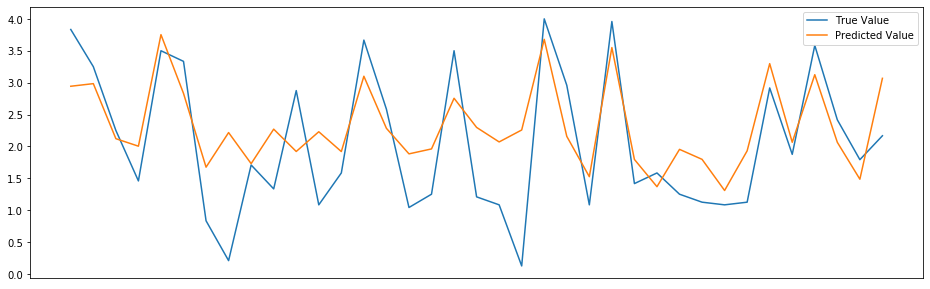

In [20]:
for i in OPTIMIZER:
    print("------------------------------------------\n" + str(i).split("(")[0].split(".")[-1].split(" ")[0]+ "\n------------------------------------------\n")
    model = getmodel(i)
    _ = model.fit(X_train.values, Y_train.values,
          batch_size=32,
          steps_per_epoch=10,
          epochs=25,
          verbose=0,
          callbacks=[myCallbacks()])
    plotter.find_accurracy_on_testset(model, X_test, Y_test,clip=True, plot=True)
    print("\n\n\n\n")